In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/siiddd/SignalStrengthUsingANN/main/signal.csv')
df.head(3)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [51]:
# Check for Missing Values
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [52]:
# Statistical Analysis
df_stat = df.describe()
df_stat

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

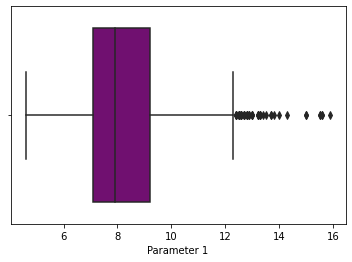

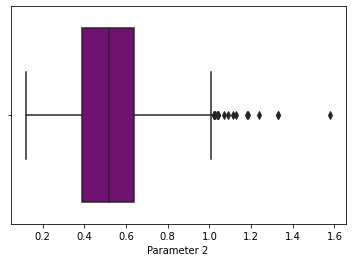

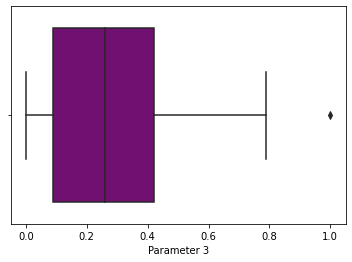

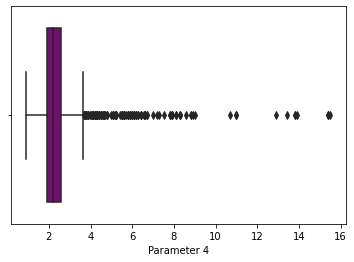

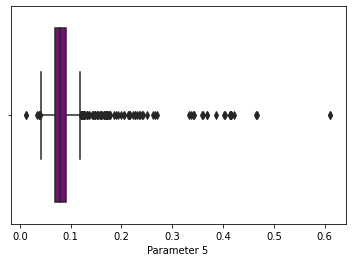

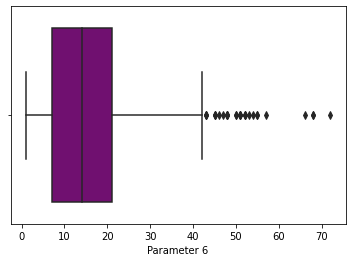

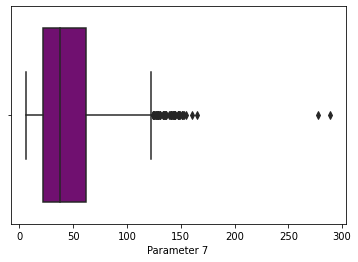

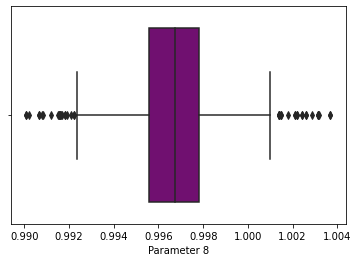

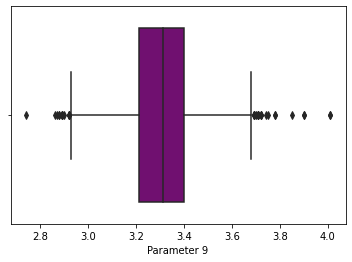

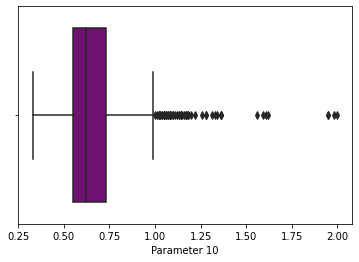

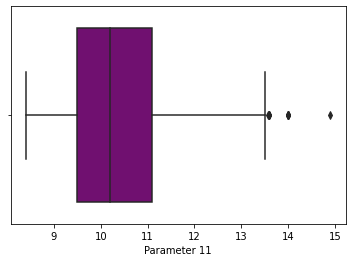

In [54]:
%matplotlib inline

# Outlier Detection
for i in range(0, df.shape[1]-1):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

In [55]:
# Outlier Treatment
from scipy.stats import iqr as iqr

for i in range (0, df.shape[1]-1): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] > (np.percentile(df.iloc[:, i], 75) + (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 90)

for i in range (0, df.shape[1]-1): #Cols
    for j in range (0, df.shape[0]): #Rows
        if(df.iloc[j,i] < (np.percentile(df.iloc[:, i], 25) - (1.5*(iqr(df.iloc[:, i]))))):
            df.iloc[j,i] = np.percentile(df.iloc[:, i], 5)

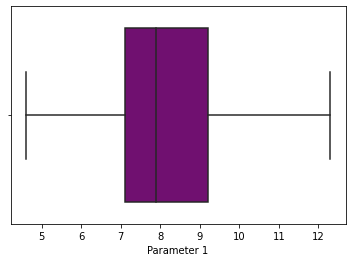

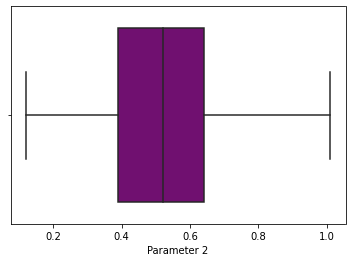

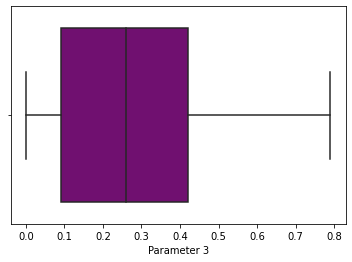

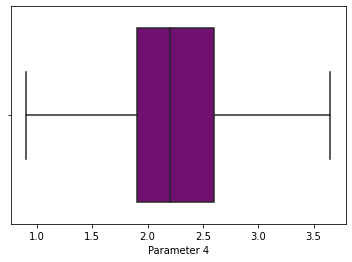

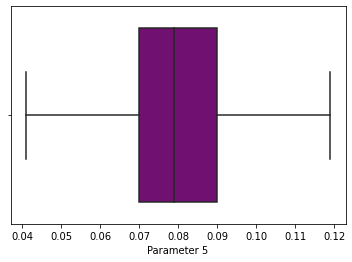

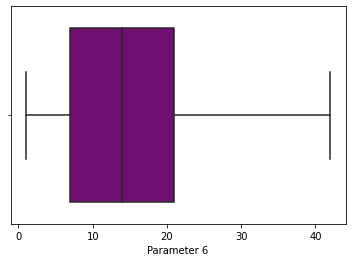

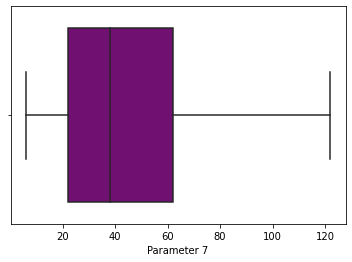

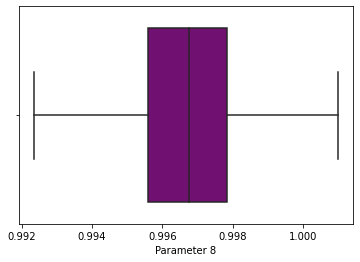

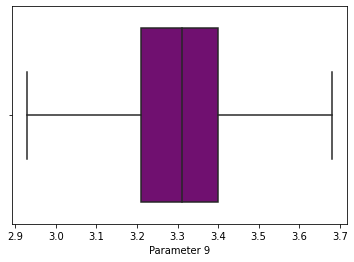

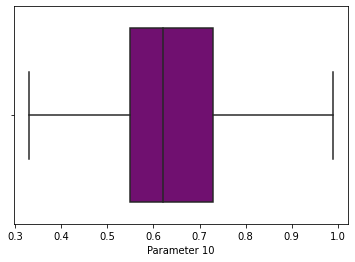

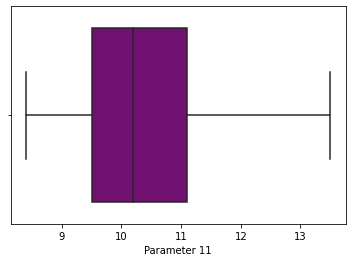

In [56]:
# Outlier Detection
for i in range(0, df.shape[1]-1):
    sns.boxplot(df.iloc[:, i], color = 'purple')
    plt.show()

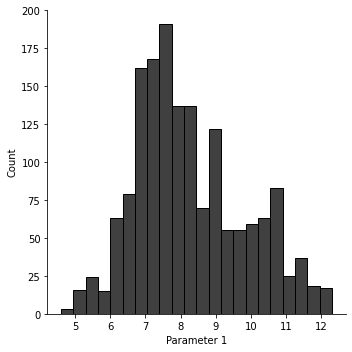

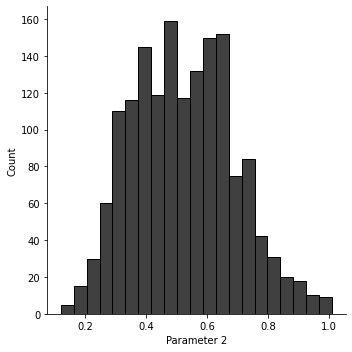

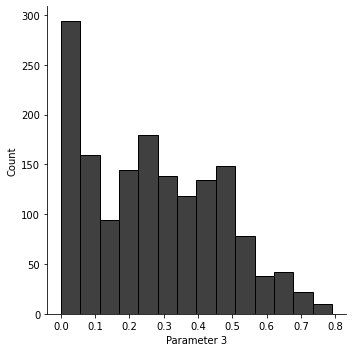

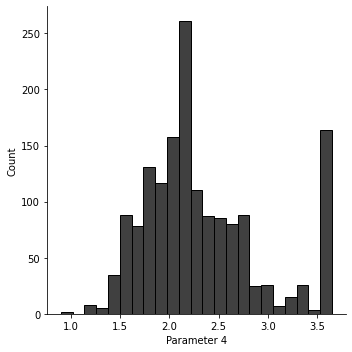

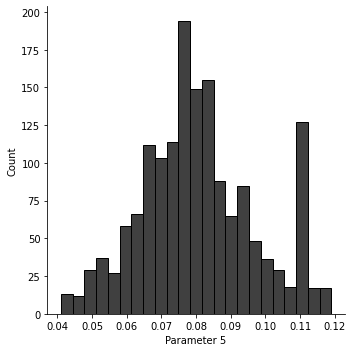

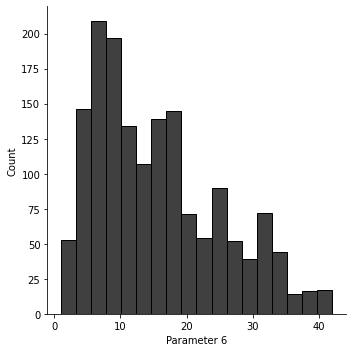

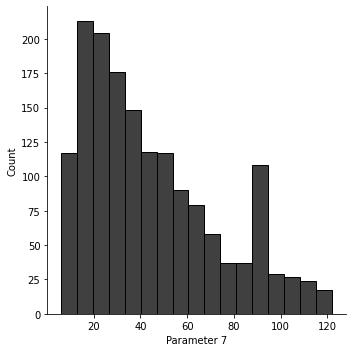

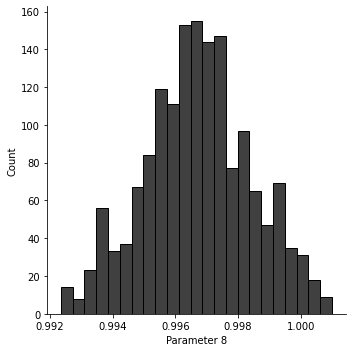

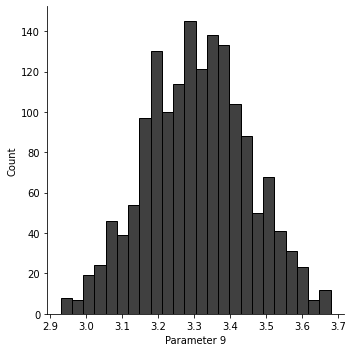

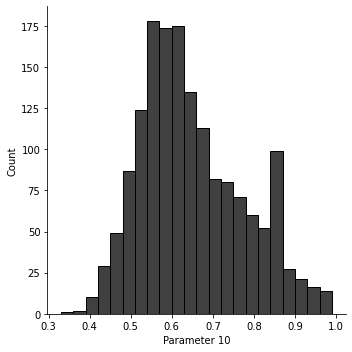

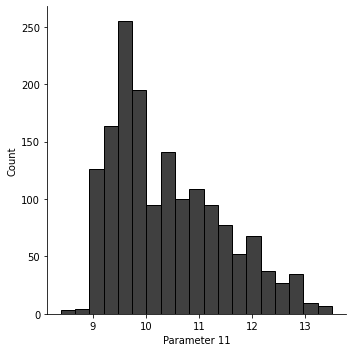

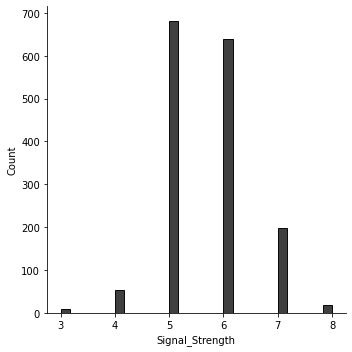

In [57]:
# Univariate Analysis
for i in range(0, df.shape[1]):
    sns.displot(df.iloc[:, i], color = 'black')
    plt.show()

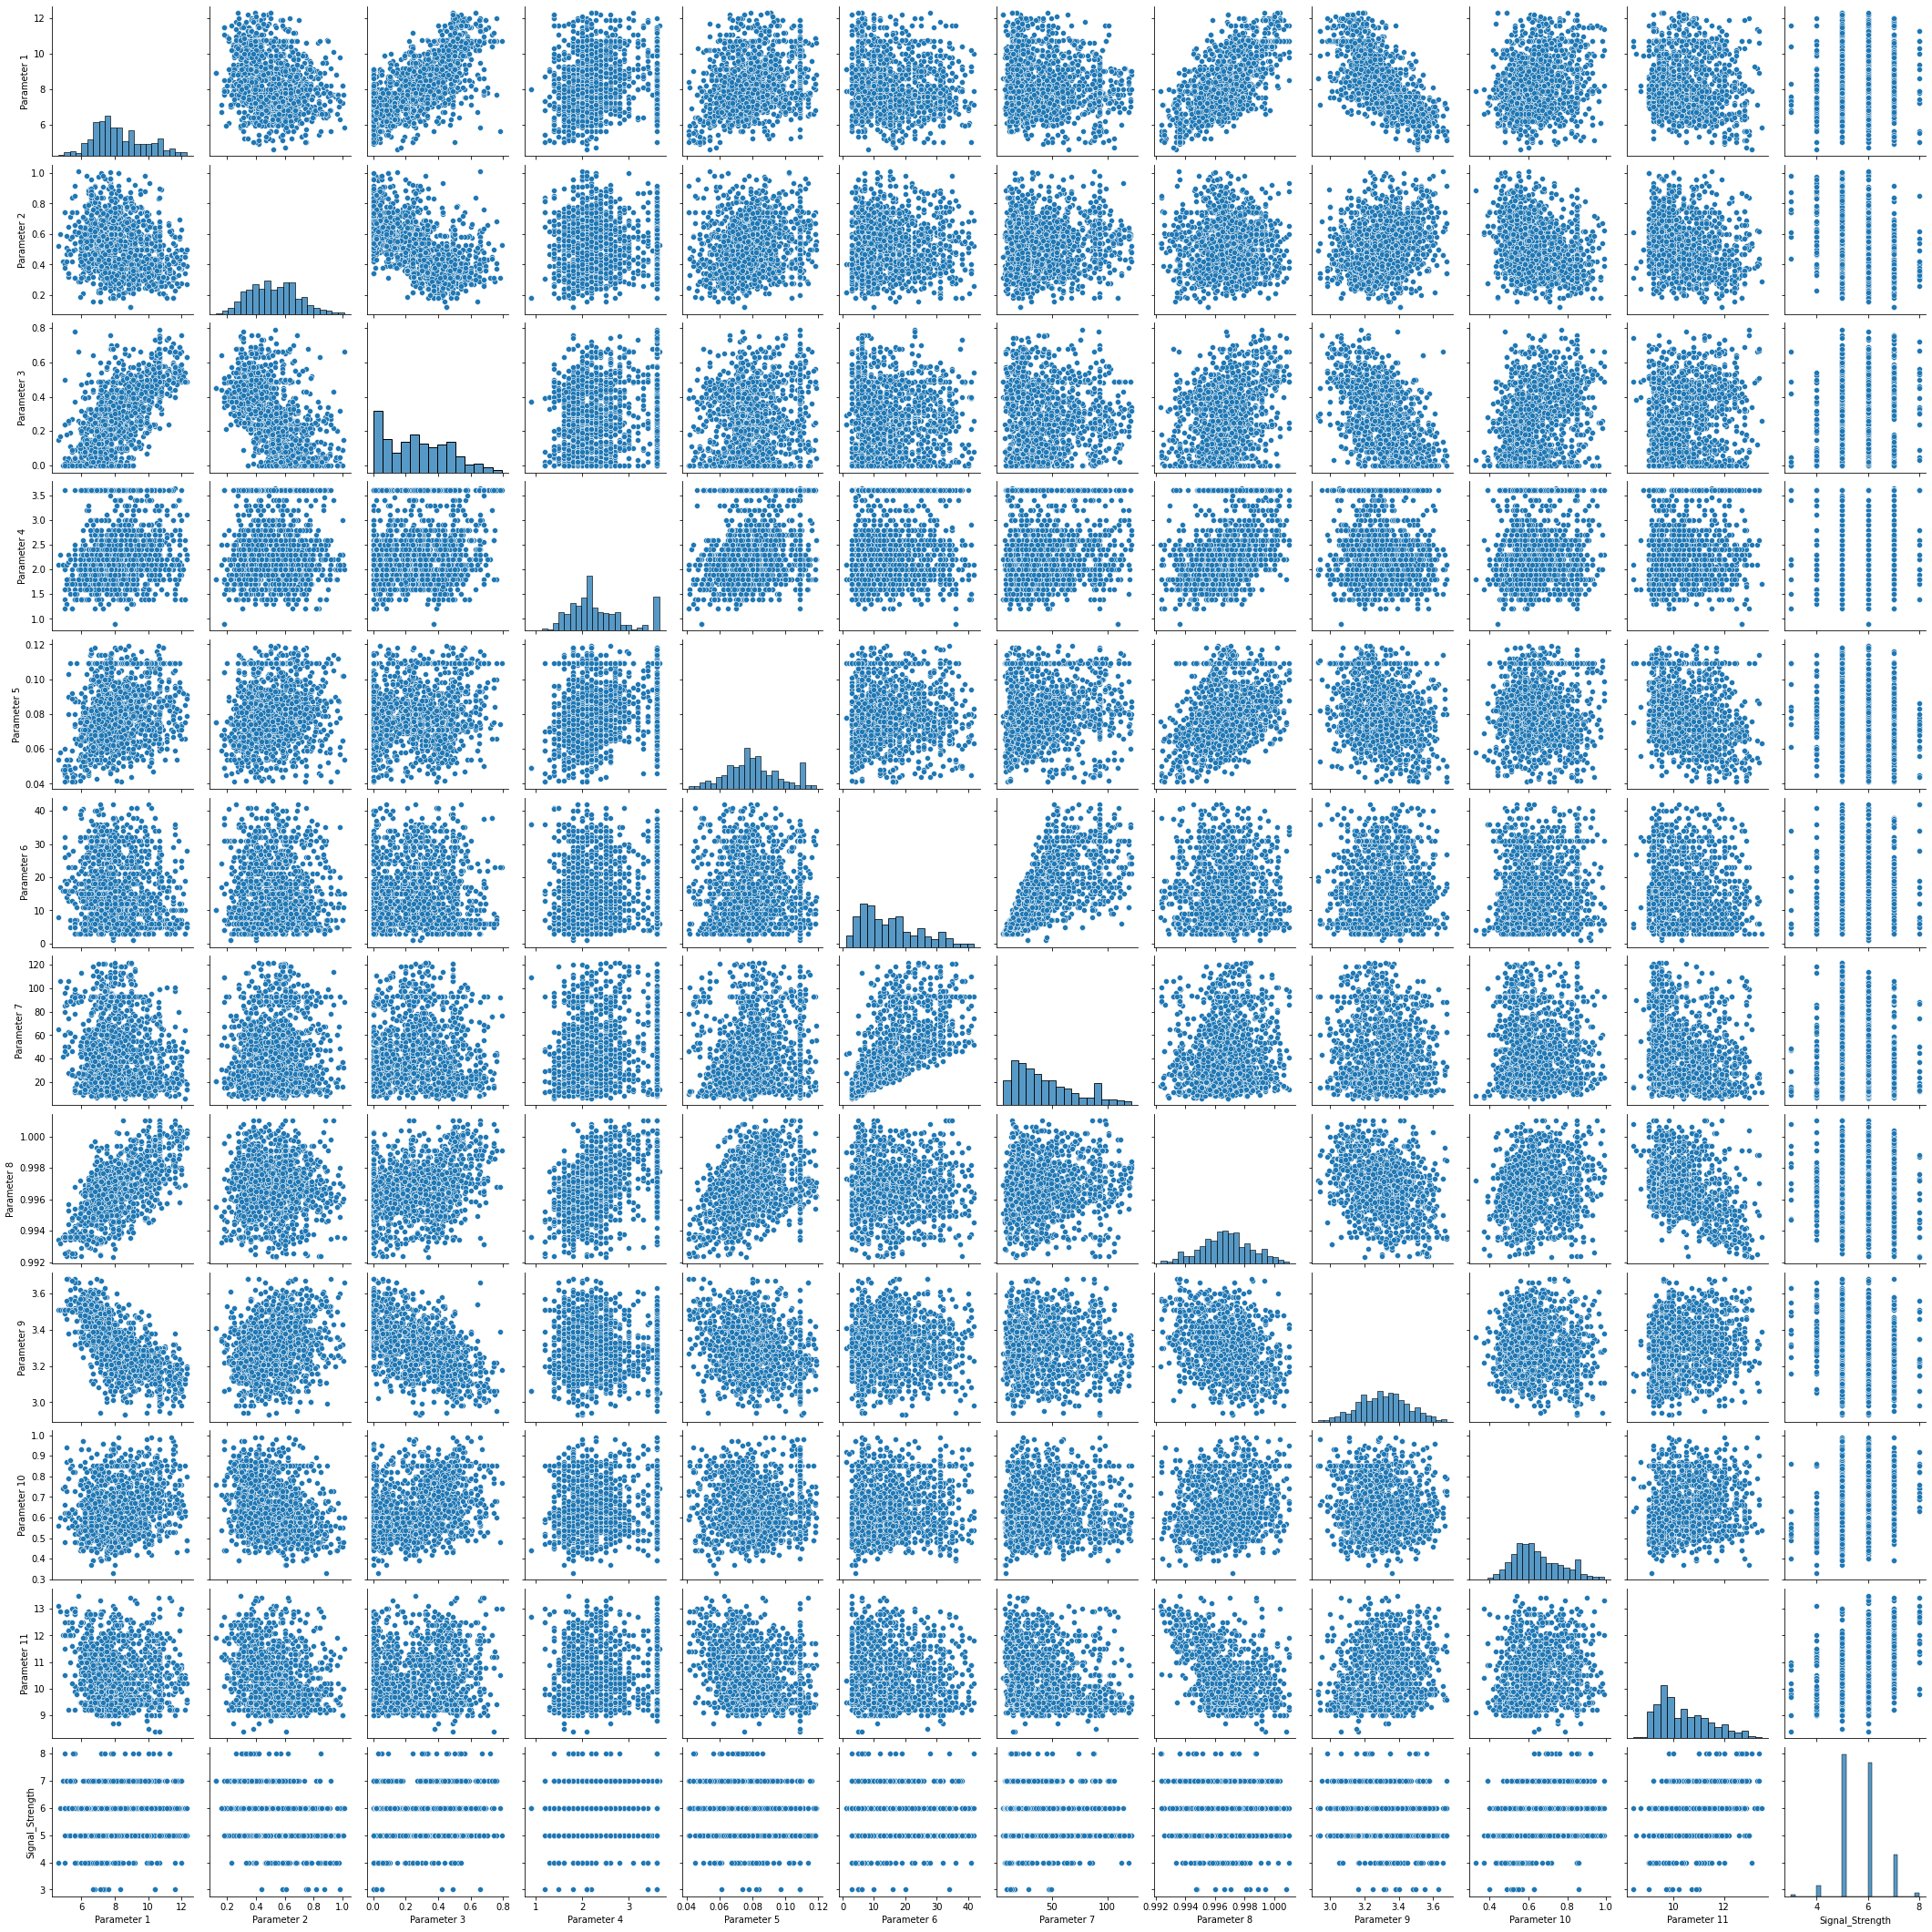

In [58]:
# Multivariate analysis
sns.pairplot(df)

In [59]:
# Correlation Matrix
df_corr = df.corr()
df_corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.275030,0.672924,0.203110,0.246456,-0.159642,-0.122742,0.648562,-0.681188,0.216167,-0.063315,0.123177
Parameter 2,-0.275030,1.000000,-0.570169,0.041231,0.140994,-0.000826,0.095999,0.015954,0.234440,-0.328181,-0.217503,-0.375470
Parameter 3,0.672924,-0.570169,1.000000,0.182555,0.138565,-0.062304,0.009600,0.364101,-0.546772,0.323026,0.121288,0.230375
Parameter 4,0.203110,0.041231,0.182555,1.000000,0.221057,0.066786,0.155091,0.405796,-0.090519,0.048491,0.111660,0.024244
Parameter 5,0.246456,0.140994,0.138565,0.221057,1.000000,-0.022768,0.101824,0.415354,-0.248722,0.045084,-0.294799,-0.184175
Parameter 6,-0.159642,-0.000826,-0.062304,0.066786,-0.022768,1.000000,0.685410,-0.037145,0.083142,0.044713,-0.073079,-0.050267
Parameter 7,-0.122742,0.095999,0.009600,0.155091,0.101824,0.685410,1.000000,0.105062,-0.037564,-0.023529,-0.242659,-0.196803
Parameter 8,0.648562,0.015954,0.364101,0.405796,0.415354,-0.037145,0.105062,1.000000,-0.315678,0.153627,-0.496937,-0.179151
Parameter 9,-0.681188,0.234440,-0.546772,-0.090519,-0.248722,0.083142,-0.037564,-0.315678,1.000000,-0.098068,0.170720,-0.068901
Parameter 10,0.216167,-0.328181,0.323026,0.048491,0.045084,0.044713,-0.023529,0.153627,-0.098068,1.000000,0.182837,0.361811


In [60]:
# Variable Inflation Factor to Eliminate Muliticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF

,Column,VIF Values
0,const,1.891060e+06
1,Parameter 1,5.791158e+00
2,Parameter 2,1.863542e+00
3,Parameter 3,2.977408e+00
4,Parameter 4,1.754890e+00
5,Parameter 5,1.320826e+00
6,Parameter 6,2.039398e+00
7,Parameter 7,2.332230e+00
8,Parameter 8,5.713551e+00
9,Parameter 9,2.790986e+00


In [61]:
# Dropping Features with High VIF
df = df.drop(columns = 'Parameter 1', axis = 1)

df_constant = add_constant(df)
df_VIF = pd.DataFrame()
df_VIF['Column'] = df_constant.columns
df_VIF['VIF Values'] = [VIF(df_constant.values,i) for i in range(df_constant.shape[1])]
df_VIF


,Column,VIF Values
0,const,955063.485231
1,Parameter 2,1.862796
2,Parameter 3,2.769124
3,Parameter 4,1.588384
4,Parameter 5,1.314369
5,Parameter 6,2.024938
6,Parameter 7,2.218188
7,Parameter 8,2.784563
8,Parameter 9,1.624266
9,Parameter 10,1.350964


In [62]:
# Encoding Signal Strength
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

df['Signal_Strength'] = le.fit_transform(df['Signal_Strength'])
df['Signal_Strength']

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: Signal_Strength, Length: 1599, dtype: int64

In [63]:
# Test Train Split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(df.iloc[:, :-1], pd.DataFrame(df.iloc[:, -1]), train_size = 0.85)
print(x_train, y_train)

      Parameter 2  Parameter 3  ...  Parameter 10  Parameter 11
635         0.840         0.00  ...          0.55           9.7
134         0.745         0.05  ...          0.55           9.9
1126        0.290         0.26  ...          0.54          13.5
1178        0.915         0.00  ...          0.73          11.4
96          0.775         0.00  ...          0.56          10.7
...           ...          ...  ...           ...           ...
614         0.755         0.18  ...          0.85          10.2
898         0.310         0.39  ...          0.77          12.5
841         0.660         0.00  ...          0.63          10.3
200         0.320         0.47  ...          0.82          10.3
349         0.785         0.00  ...          0.86           9.4

[1359 rows x 10 columns]       Signal_Strength
635                 2
134                 3
1126                3
1178                2
96                  2
...               ...
614                 3
898                 4
841     

In [73]:
# Feature scaling all the Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) 
x_train

array([[ 1.89560482, -1.40998651, -1.51925068, ..., -0.26748087,
        -0.75708294, -0.68706028],
       [ 1.32776125, -1.15047066, -0.19447578, ..., -0.61347983,
        -0.75708294, -0.49050596],
       [-1.39191058, -0.06050405, -1.02246009, ...,  0.56291663,
        -0.83688405,  3.04747183],
       ...,
       [ 0.81969069, -1.40998651,  1.13029911, ...,  0.97811538,
        -0.11867406, -0.09739732],
       [-1.21259156,  1.02946256, -1.51925068, ..., -0.61347983,
         1.39754704, -0.09739732],
       [ 1.56685328, -1.40998651,  0.46791166, ...,  0.35531725,
         1.71675148, -0.98189177]])

**We will build a Neural Network Model first without Feature Scaling and then with Feature Scaling to see the difference**

In [68]:
# Import Neural Network Libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU, PReLU
from keras.activations import relu, softmax, sigmoid

In [74]:
# Add Neurons and Hidden Layers
classifier = Sequential()

classifier.add(Dense(input_dim = 10, kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 100)) #Input Layer / First Hidden Layer

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 50)) #Second Hidden Layer
classifier.add(Dropout(0.20))
classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 50)) #Third Hidden Layer
classifier.add(Dropout(0.20))
classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 50)) #Fourth Hidden Layer
classifier.add(Dropout(0.10))

classifier.add(Dense(kernel_initializer  = 'he_uniform', activation  = 'ELU', units = 10)) #Twelfth Hidden Layer

classifier.add(Dense(kernel_initializer  = 'glorot_uniform', activation = 'Softmax', units = 6)) #Output Layer

In [75]:
#Declare the Optimizer and Loss

classifier.compile(optimizer = 'adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_96 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_33 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)               

In [76]:
#Run the ANN
ann = classifier.fit(x_train, y_train, validation_split = 0.80, epochs = 500)

Epoch 1/500
9/9 [==============================] - 1s 32ms/step - loss: 3.5995 - accuracy: 0.0959 - val_loss: 2.2531 - val_accuracy: 0.2178
Epoch 2/500
9/9 [==============================] - 0s 12ms/step - loss: 2.5444 - accuracy: 0.1845 - val_loss: 1.7995 - val_accuracy: 0.3511
Epoch 3/500
9/9 [==============================] - 0s 15ms/step - loss: 2.1541 - accuracy: 0.2989 - val_loss: 1.5905 - val_accuracy: 0.4384
Epoch 4/500
9/9 [==============================] - 0s 12ms/step - loss: 1.9166 - accuracy: 0.3506 - val_loss: 1.4835 - val_accuracy: 0.4706
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 1.6381 - accuracy: 0.3911 - val_loss: 1.4204 - val_accuracy: 0.4881
Epoch 6/500
9/9 [==============================] - 0s 13ms/step - loss: 1.5897 - accuracy: 0.4170 - val_loss: 1.3692 - val_accuracy: 0.4991
Epoch 7/500
9/9 [==============================] - 0s 11ms/step - loss: 1.4731 - accuracy: 0.5092 - val_loss: 1.3306 - val_accuracy: 0.5009
Epoch 8/500
9/9 [===

In [77]:
ann.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

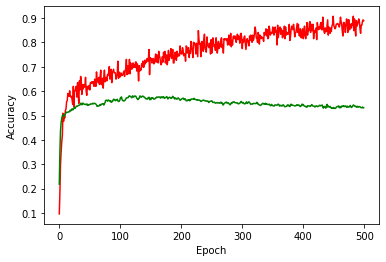

In [78]:
plt.plot(ann.history['accuracy'], color = 'red')
plt.plot(ann.history['val_accuracy'], color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [79]:
# Predicting Using our model
y_pred = classifier.predict(x_test)
y_pred_final = []

In [80]:
# Creating a list for Prediction
for anything in y_pred:
  y_pred_final.append(np.argmax(anything))

len(y_pred_final)

240

In [81]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  9,  2,  0,  0],
       [ 0,  0, 72, 22,  0,  0],
       [ 0,  2, 34, 37, 18,  0],
       [ 0,  1,  4, 14, 20,  1],
       [ 0,  0,  0,  0,  2,  1]])

In [82]:
# Score of our Model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred_final)
score

0.5416666666666666